# The Sparks Foundation

# GRIP(Graduate Rotational Internship Program April-2024)

# NAME : AKSHAY KUMAR SINGH

# Domain : Data Science and Business Analytics

# Task 03 : Exploratory Data Analysis :Retail


# Problem Statement :

• Perform 'Exploratory Data Analysis' on dataset 'SampleSuperstore'.

• As a business manager, try to find out the weak areas where you can work to make more profit.

• What all business problems you can derive by exploring the data?

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [19]:
df=pd.read_csv(r"C:\Users\msian\Downloads\SampleSuperstore (1).csv")
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [20]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Checking for the duplicates

In [21]:
df.duplicated().sum()

17

# Removing Duplicates

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


# Descriptive Statistics

In [24]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


# Checking for null values

In [25]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No Null Values count

# Now we have check that our data is clean now we start our first visualization


# 1-Checking which segment is profitable for Company

Segment
Consumer       134007.4413
Corporate       91954.9798
Home Office     60279.0015
Name: Profit, dtype: float64


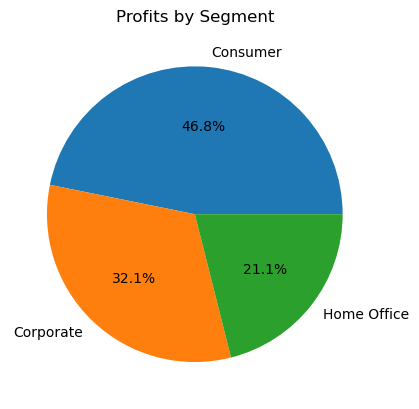

In [26]:
# Profitability by Segment
profit_seg = df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)
print(profit_seg)
plt.pie(profit_seg, labels=profit_seg.index, autopct='%1.1f%%')
plt.title('Profits by Segment')
plt.show()

As from above barchart we can we clearly say that the profitable segment is <b> Consumer segment.

# 2-Now we check which category is good for Company

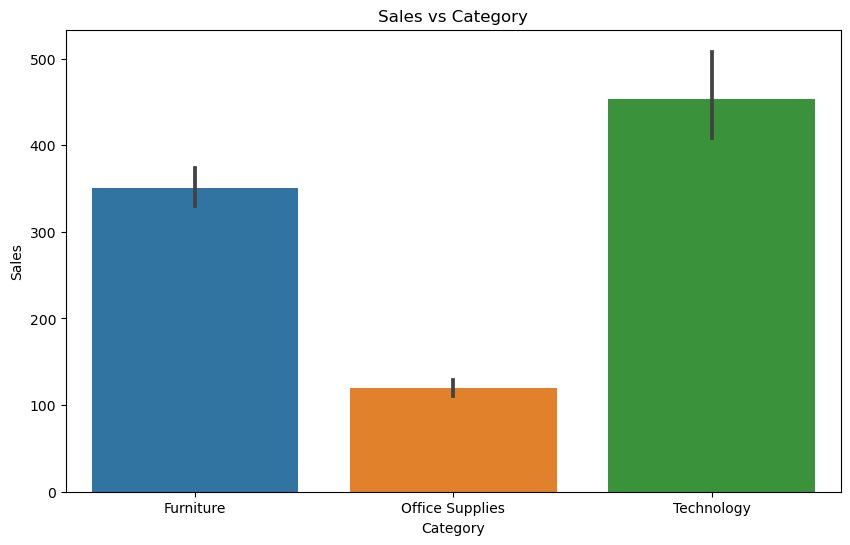

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(data=df , x="Category",y="Sales")
plt.title("Sales vs Category")
plt.show()

Technology categories sales are good for company and we see that office supplies is not doing well so we should work on that category or we can replace it and try other category like sports. Craze for sports is increasing day by day. 

# 3-Relation between Discount and Profit

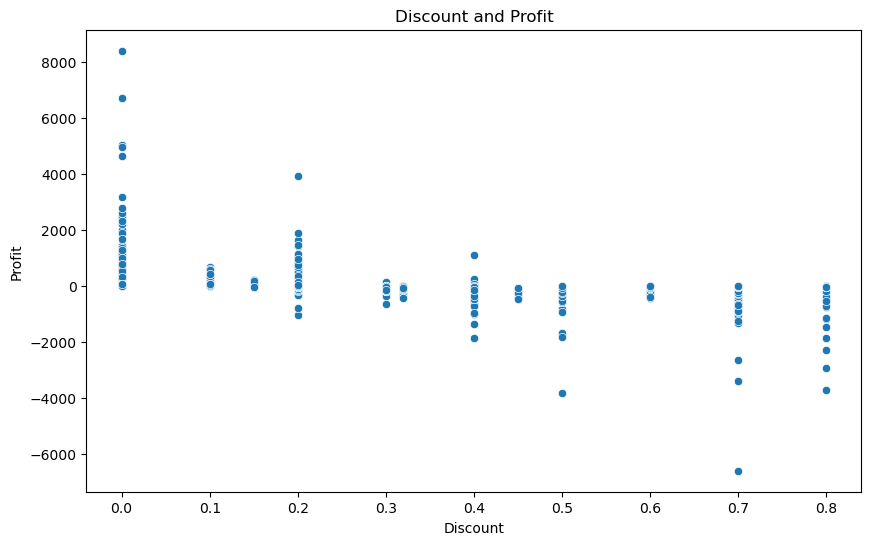

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df , x="Discount" , y="Profit")
plt.title("Discount and Profit")
plt.show()

# 4-Now we will check which Sub-Category has max numbers of purchase.

In [52]:
x=df.groupby(['Sub-Category']).size().reset_index(name='counts')
print(x)

   Sub-Category  counts
0   Accessories     775
1    Appliances     466
2           Art     795
3       Binders    1522
4     Bookcases     228
5        Chairs     615
6       Copiers      68
7     Envelopes     254
8     Fasteners     217
9   Furnishings     956
10       Labels     363
11     Machines     115
12        Paper    1359
13       Phones     889
14      Storage     846
15     Supplies     190
16       Tables     319


In [53]:
pie=px.pie(x,values='counts',names='Sub-Category')
pie

by above piechart we can see that all the sub-category with the sales in percentage

# 5-Now we will check which City has max numbers of purchase

In [32]:
x=df.groupby(["City"]).size().reset_index(name="counts")
x

,City,counts
0,Aberdeen,1
1,Abilene,1
2,Akron,21
3,Albuquerque,14
4,Alexandria,16
...,...,...
526,Woonsocket,4
527,Yonkers,15
528,York,5
529,Yucaipa,1


In [33]:
X=x=x.sort_values(by="counts",ascending=False)
Top10=X.head(10)
Top10

,City,counts
329,New York City,914
266,Los Angeles,746
374,Philadelphia,536
438,San Francisco,506
452,Seattle,424
207,Houston,375
80,Chicago,313
94,Columbus,221
437,San Diego,170
464,Springfield,163


In [34]:
pie=px.pie(Top10,values='counts',names='City')
pie

by the chart we can see all the city. Newyork,Los Angeles,Philadelphia and San Francisco are definitely good for company.

# 6-Calculate total profit for each city

In [35]:
# Calculate total profit for each city
city_profit = df.groupby('City')['Profit'].sum().sort_values(ascending=False)
# Extract top 10 cities
top_10_cities_profit = city_profit.head(10).index
# Filter data for top 10 cities
top_10_profit_df = df[df['City'].isin(top_10_cities_profit)]

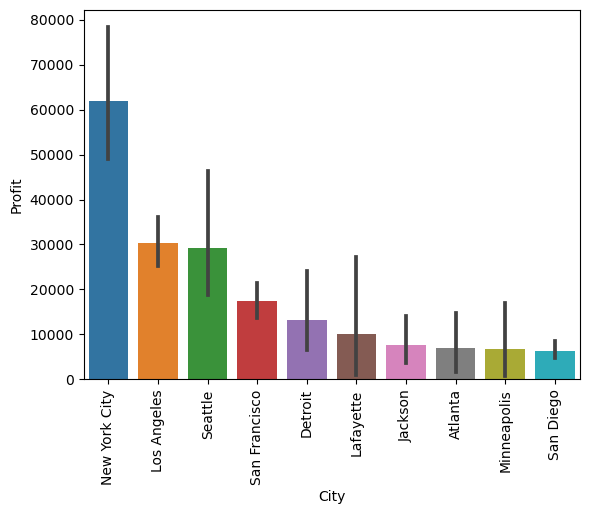

In [36]:
sns.barplot(data=top_10_profit_df , x = "City" , y='Profit' ,order = top_10_cities_profit , estimator=sum)
plt.title("")
plt.xticks(rotation=90)
plt.show()

From above chart we conclude that <b> Newyork , Los Angeles , Seattle </b> are profit making cities.

# 7-correlation between sales,Quantity ,profit and discount 

In [37]:

comparison = df[['Sales', 'Quantity', 'Discount', 'Profit']]

# Calculating the correlation matrix
correlation = comparison.corr()
correlation

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


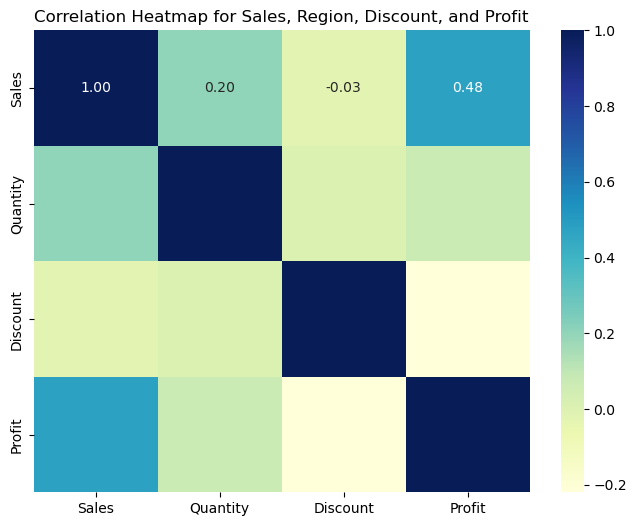

In [38]:
# Creating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Correlation Heatmap for Sales, Region, Discount, and Profit')
plt.show()

<b> Sales and Profit </b> are <b> Positively Corelated </b> & 
<b> Discount and Profit </b> are <b>Negatively corelated </b>

# 8- Top 10 state according to the sales

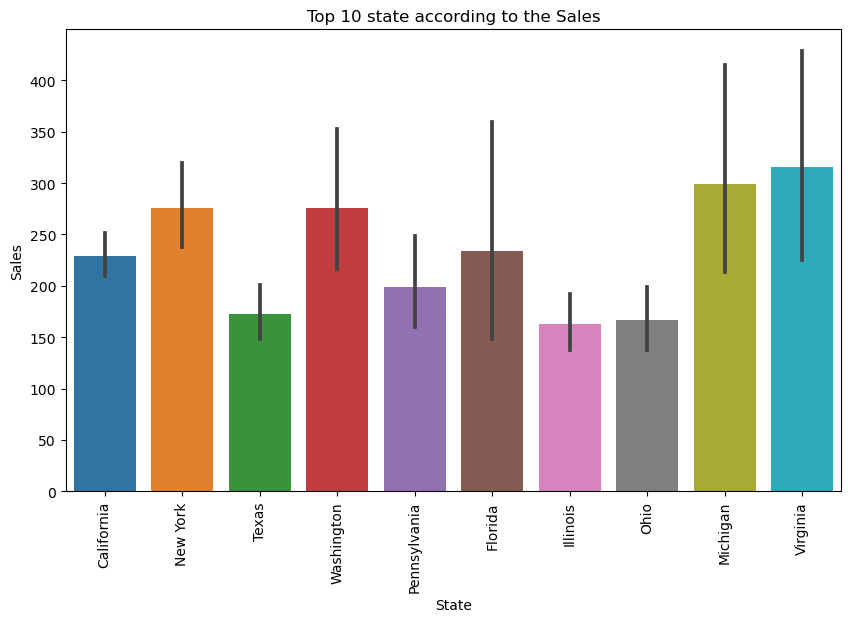

In [39]:
city_profit = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
# Extract top 10 cities
top_10_cities_profit = city_profit.head(10).index
# Filter data for top 10 cities
top_10_profit_df = df[df['State'].isin(top_10_cities_profit)]  
plt.figure(figsize=(10, 6)) 
sns.barplot(data=top_10_profit_df, x="State", y="Sales", order=top_10_cities_profit)
plt.title("Top 10 state according to the Sales")
plt.xticks(rotation=90)  
plt.show()

# 9 - All region according to the Profit

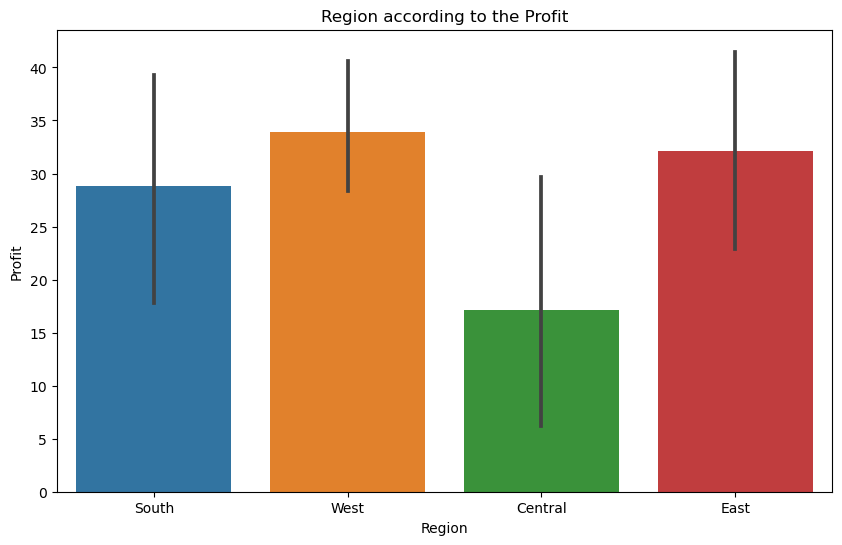

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(data=df , x = "Region", y="Profit")
plt.title("Region according to the Profit")
plt.show()


In [41]:
region_for_profit = df.groupby(['Region'])['Profit'].sum()
region_for_profit

Region
Central     39655.8752
East        91506.3092
South       46749.4303
West       108329.8079
Name: Profit, dtype: float64

<b>West Region is Profitable</b> and after that <b>East region is performing Good</b>

# 10 - All region according to the Sales

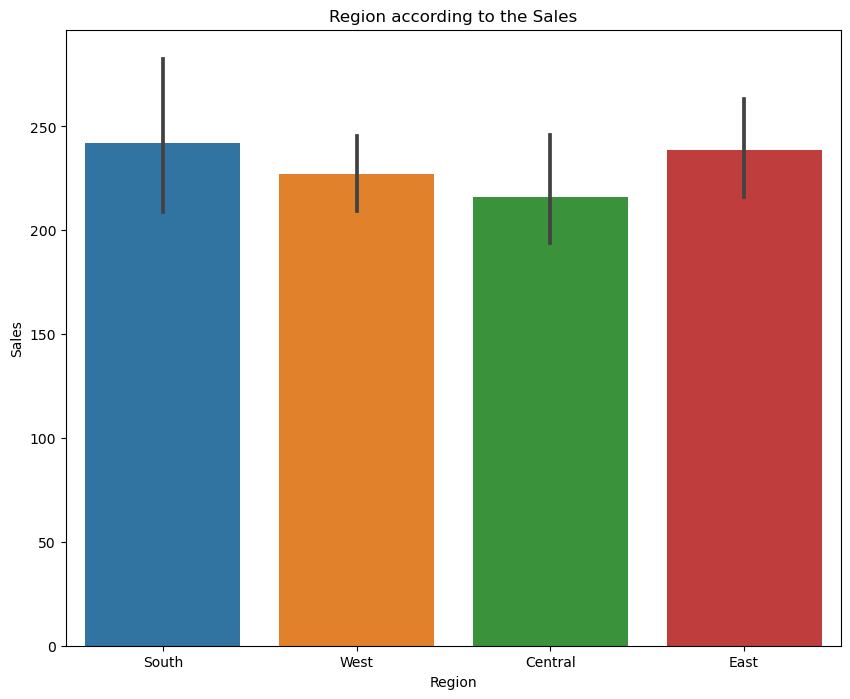

In [42]:
plt.figure(figsize=(10,8))
sns.barplot(data=df , x = "Region", y="Sales")
plt.title("Region according to the Sales")
plt.show()

 <b>South and East region</b> are pretty Similar.

# 11- All region according to the Discount

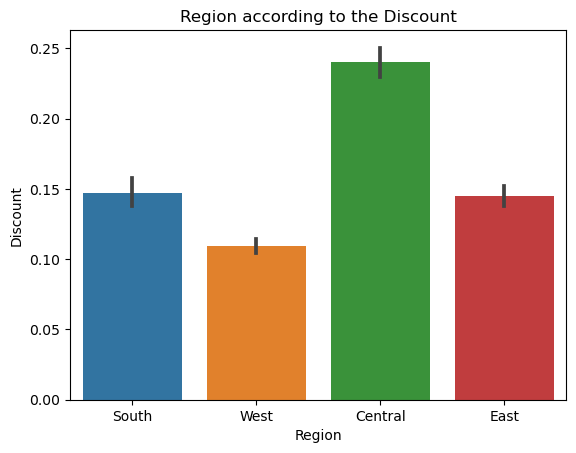

In [43]:
sns.barplot(data=df , x= "Region" , y="Discount")
plt.title("Region according to the Discount")
plt.show()

In [44]:
region_for_discount = df.groupby(['Region'])['Discount'].sum()
region_for_discount

Region
Central    557.14
East       413.50
South      238.55
West       350.00
Name: Discount, dtype: float64

Central Region got the most discounts

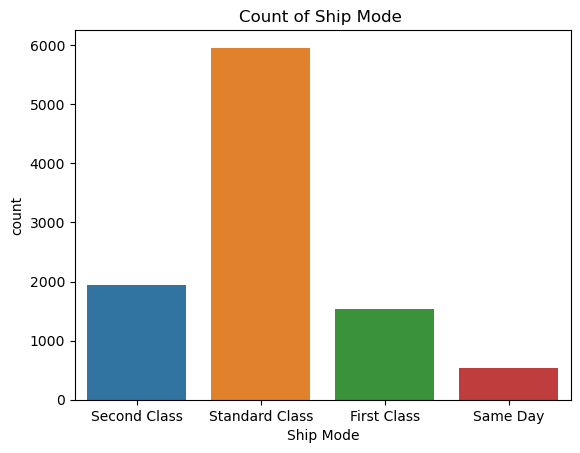

In [46]:
sns.countplot(data=df, x="Ship Mode")
plt.title("Count of Ship Mode ")
plt.show()


standard Class shipmode is profitable

# Conclusion:
 <b>Segment</b> : Consumer segment is the most crucial for the company's profitability.
 
 <b>Ship Mode</b> : Highest profit is <b>Standard class</b>.
 
 <b>Category</b> :  The most crucial revenue generator for the company is <b>Technology category.
    
 <b>Relation between Discount and profit</b>: The highest profits appear to be generated at discount levels around 0.1 to 0.2.
    
 <b>Sub-Category</b> : The data indicates that Binders and Paper are the core product categories
  
 <b>Region wise profit</b>: West region has the highest profit
   
 <b>City with high Profit</b> : <b> NewYork</b> city has the highest profit.

# Suggestion:
. Regularly review performance and growth potential across all segments and regions

. Closely examine and potentially reallocate resources from lower-performing Office Supplies segment and South/Central regions

. Stay agile by continuously analyzing market trends, customer preferences, and competition.

. Analyze the potential for expansion in the Home Office segment and Furniture category

. By focusing on the core strengths, selectively pursuing growth opportunities, optimizing resource allocation, and maintaining adaptability, the company can position itself for sustained profitability and growth across its diverse business.